### If running on AWS SageMaker, download the required libraries:

In [ ]:
#!pip install -r classification_requirements.txt

# MLP-Based Classification

In [1]:
import os
import sys
import pandas as pd
sys.path.append('..')
import lib.models as mods

from datetime import datetime

/Users/erictria/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-04 20:44:52.845484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
s3_path = 's3://hum-rnd-data/UVA/'

date_today = datetime.now().strftime('%Y-%m-%d')
# END_DATE = date_today
END_DATE = '2023-03-31'

classification_file_name = 'classification_data_{}.csv'.format(END_DATE)
training_labels_file_name = 'training_labels_{}.csv'.format(END_DATE)

# If running on AWS SageMaker / Reading from S3
# classification_file_name = s3_path + classification_file_name
# training_labels_file_name = s3_path + training_labels_file_name

### Load in data and select features

In [3]:
classification_df = pd.read_csv(classification_file_name)
classification_df.sort_values(by = 'PROFILE_ID', inplace= True)
classification_df

,PROFILE_ID,REACHED_16_EVENTS,RECENT_LAST_EVENT,EVENT_CYCLES_F16,DISTINCT_ARTICLES_F16,PERCENT_GOOGLE_ARTICLES_F16,PERCENT_ARTICLE_CONTENT_F16,AVERAGE_CONTENT_SCORE_F16,DAYS_TO_16_EVENTS,EVENTS,FIRST_EVENT_TIME,EVENT_TIME_16,DISTINCT_DAYS_F16,ARTICLES_PER_EVENT_F16,EVENT_DENSITY_F16
0,--0p74IB28LFeUkXSg6b,1,0,2,2,0.000000,1.0,0.0,133,16,2022-08-30 14:30:38.171966,2023-01-10 16:43:55.720219,2,0.1250,8.000000
1,--6dYIIB8Tq1gs32cnxN,1,0,1,1,1.000000,1.0,0.0,7,16,2022-08-02 22:11:48.120981,2022-08-09 16:19:25.990118,4,0.0625,4.000000
2,--7CGYYBRkWobPtw2Qjb,1,1,3,1,1.000000,1.0,0.0,27,29,2023-02-04 00:10:45.911994,2023-03-03 04:29:56.373198,3,0.0625,5.333333
3,--7egIIBGoM3uBpFKICG,1,0,1,4,1.000000,1.0,0.0,5,63,2022-08-09 04:30:20.132357,2022-08-14 21:53:19.151456,3,0.2500,5.333333
4,--7xtoIBGoM3uBpFf0FV,1,0,3,2,0.000000,1.0,0.0,103,16,2022-08-19 16:30:57.064488,2022-11-30 19:41:43.155668,4,0.1250,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135540,zzlKjIIBGoM3uBpFBagQ,1,1,3,3,0.666667,1.0,0.0,133,40,2022-08-11 09:43:58.953482,2022-12-22 09:37:29.844389,4,0.1875,4.000000
135541,zzpjDYQBEEdskq5qGMuW,1,0,2,1,0.000000,1.0,0.0,17,28,2022-10-25 04:25:09.614383,2022-11-11 13:42:32.907519,7,0.0625,2.285714
135542,zzrPDIQBEEdskq5qZRER,1,1,5,3,0.333333,1.0,0.0,129,18,2022-10-25 01:43:50.150416,2023-03-03 07:59:42.533219,4,0.1875,4.000000
135543,zzsQPYQBwWEOklUHCNVJ,1,0,1,0,0.000000,0.0,0.0,2,56,2022-11-03 10:36:12.009305,2022-11-05 03:42:30.198338,3,0.0000,5.333333


In [5]:
labels = pd.read_csv(training_labels_file_name)
labels = labels.to_numpy().T[0]
labels

array([1, 1, 1, ..., 1, 0, 1])

In [6]:
feature_list = [
    'ARTICLES_PER_EVENT_F16',
    'PERCENT_GOOGLE_ARTICLES_F16',
    'PERCENT_ARTICLE_CONTENT_F16',
    'EVENT_DENSITY_F16'
]
data = classification_df[feature_list]
data

,ARTICLES_PER_EVENT_F16,PERCENT_GOOGLE_ARTICLES_F16,PERCENT_ARTICLE_CONTENT_F16,EVENT_DENSITY_F16
0,0.1250,0.000000,1.0,8.000000
1,0.0625,1.000000,1.0,4.000000
2,0.0625,1.000000,1.0,5.333333
3,0.2500,1.000000,1.0,5.333333
4,0.1250,0.000000,1.0,4.000000
...,...,...,...,...
135540,0.1875,0.666667,1.0,4.000000
135541,0.0625,0.000000,1.0,2.285714
135542,0.1875,0.333333,1.0,4.000000
135543,0.0000,0.000000,0.0,5.333333


### Create MLP model

In [8]:
etm_mlp = mods.EtmMLP(data, labels)
etm_mlp.generate_model(test_size = 0.2, random_state = 82113)

/Users/erictria/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [9]:
etm_mlp.train_model(num_epochs = 10)

Train: 0.94, Test: 0.94


### Plot training curve

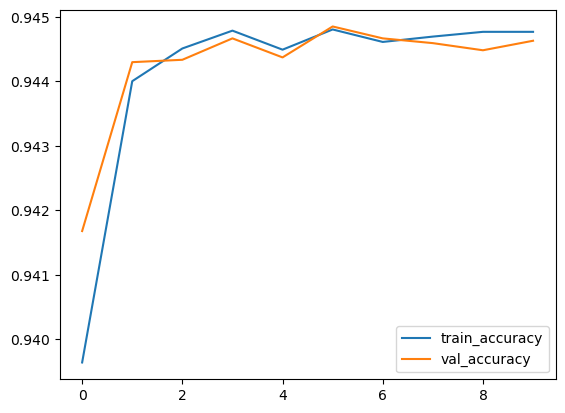

In [10]:
etm_mlp.plot_training_curve()

### Compute test prediction scores

In [11]:
val_predicts = etm_mlp.predict_test_set()
val_predicts

848/848 [==============================] - 0s 381us/step


array([[0.9149595 ],
       [0.9983645 ],
       [0.09878451],
       ...,
       [0.9222283 ],
       [0.9454212 ],
       [0.9863347 ]], dtype=float32)

### Plot ROC and compute AUROC score

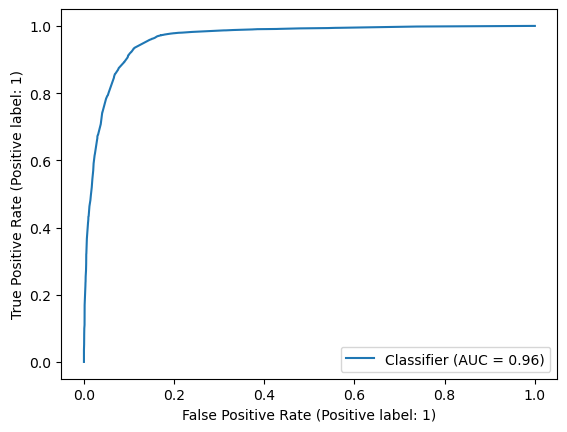

In [12]:
auroc = etm_mlp.get_auroc()

##### Find optimal cutoff threshold 

In [13]:
cutoff_threshold = etm_mlp.find_optimal_roc_cutoff()
cutoff_threshold

0.8975343108177185

### Produce confusion matrix

True Postive Rate: 0.906274312388449
True Negative Rate: 0.9030049448459491
False Postive Rate: 0.09699505515405096
False Negative Rate: 0.09372568761155096


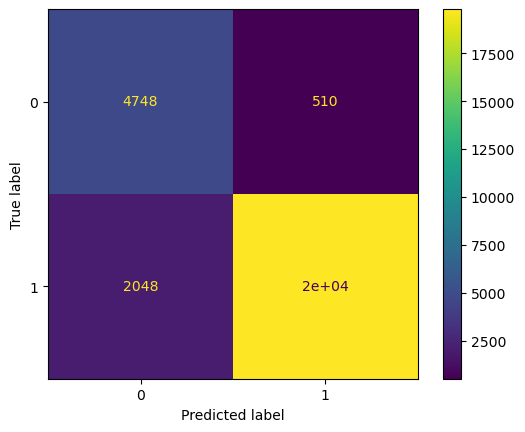

In [14]:
cm = etm_mlp.produce_confusion_matrix()

In [15]:
cm

array([[ 4748,   510],
       [ 2048, 19803]])